In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]

# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	data = series_to_supervised(train, n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(n_nodes, activation='sigmoid', input_shape=(n_input, 1)))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

# forecast with a pre-fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg, steps_out):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    history_pred =  history
    prediccionsF = []
    errors = []
    
    # step over each time-step in the test set
    for j in range(len(test)-steps_out):
        for i in range(steps_out):
            #fit model and make forecast for history
            yhat = model_predict(model, history_pred, cfg)
            # store forecast in list of predictions
            predictions.append(yhat)
            #actual observation to history for the next loop
            history_pred.append(yhat)
            # estimate prediction error
            
        history.append(test[j])
        errors.append((j,test[j:steps_out+j], predictions))
        error = measure_rmse(test[j:steps_out+j], predictions)
        prediccionsF.append(predictions)
        predictions = []
        history_pred = history
            
        
    return error, prediccionsF, test, errors

# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	#scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    scores, prediccionsF, test, errors = walk_forward_validation(data, n_test, config, steps_out)
    return scores, prediccionsF, test, errors



In [38]:
dadesSau = read_csv('dadesSau.csv', sep=';',header=0, index_col=0)
dataframe = pd.DataFrame(dadesSau.loc[dadesSau.index >= '2009-01-01']['Volum'])
data = dataframe.values

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
data = [item for sublist in dataset for item in sublist]

# data split
n_test = 704
steps_out = 15
# config [timesteps, nodes, epochs, batch_size, diff]
config = [30, 100, 100, 32, 0]
# grid search
scores, prediccionsF, test, errors = repeat_evaluate(data, config, n_test, steps_out)


In [45]:
dia1 = []
dia2 = []
dia3 = []
dia4 = []
dia5 = []
dia6 = []
dia7 = []
dia8 = []
dia9 = []
dia10 = []
dia11 = []
dia12 = []
dia13 = []
dia14 = []
dia15 = []

test1 = []
test2 = []
test3 = []
test4 = []
test5 = []
test6 = []
test7 = []
test8 = []
test9 = []
test10 = []
test11 = []
test12 = []
test13 = []
test14 = []
test15 = []

for x in errors:
    testPredict = scaler.inverse_transform(x[2])
    dia1.append(testPredict[0])
    dia2.append(testPredict[1])
    dia3.append(testPredict[2])
    dia4.append(testPredict[3])
    dia5.append(testPredict[4])
    dia6.append(testPredict[5])
    dia7.append(testPredict[6])
    dia8.append(testPredict[7])
    dia9.append(testPredict[8])
    dia10.append(testPredict[9])
    dia11.append(testPredict[10])
    dia12.append(testPredict[11])
    dia13.append(testPredict[12])
    dia14.append(testPredict[13])
    dia15.append(testPredict[14])

dia1=[item for sublist in dia1 for item in sublist]
dia2=[item for sublist in dia2 for item in sublist]
dia3=[item for sublist in dia3 for item in sublist]
dia4=[item for sublist in dia4 for item in sublist]
dia5=[item for sublist in dia5 for item in sublist]
dia6=[item for sublist in dia6 for item in sublist]
dia7=[item for sublist in dia7 for item in sublist]
dia8=[item for sublist in dia8 for item in sublist]
dia9=[item for sublist in dia9 for item in sublist]
dia10=[item for sublist in dia10 for item in sublist]
dia11=[item for sublist in dia11 for item in sublist]
dia12=[item for sublist in dia12 for item in sublist]
dia13=[item for sublist in dia13 for item in sublist]
dia14=[item for sublist in dia14 for item in sublist]
dia15=[item for sublist in dia15 for item in sublist]

dialist=[dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,dia10,dia11,dia12,dia13,dia14,dia15]
dialist = np.array(dialist)
dialist = dialist.T
dialist = np.array(dialist)

for x in errors:
    testR = np.array(x[1])
    testR = np.array(testR).reshape((testR.shape[0], 1))
    testR = scaler.inverse_transform(testR)
    test1.append(testR[0])
    test2.append(testR[1])
    test3.append(testR[2])
    test4.append(testR[3])
    test5.append(testR[4])
    test6.append(testR[5])
    test7.append(testR[6])
    test8.append(testR[7])
    test9.append(testR[8])
    test10.append(testR[9])
    test11.append(testR[10])
    test12.append(testR[11])
    test13.append(testR[12])
    test14.append(testR[13])
    test15.append(testR[14])


test1=[item for sublist in test1 for item in sublist]
test2=[item for sublist in test2 for item in sublist]
test3=[item for sublist in test3 for item in sublist]
test4=[item for sublist in test4 for item in sublist]
test5=[item for sublist in test5 for item in sublist]
test6=[item for sublist in test6 for item in sublist]
test7=[item for sublist in test7 for item in sublist]
test8=[item for sublist in test8 for item in sublist]
test9=[item for sublist in test9 for item in sublist]
test10=[item for sublist in test10 for item in sublist]
test11=[item for sublist in test11 for item in sublist]
test12=[item for sublist in test12 for item in sublist]
test13=[item for sublist in test13 for item in sublist]
test14=[item for sublist in test14 for item in sublist]
test15=[item for sublist in test15 for item in sublist]

testlist=[test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13,test14,test15]

testlist = np.array(testlist)

testlist = testlist.T

In [46]:
dies = list()
    # calculem RMSE per cada dia
res_rmse1 = measure_rmse(test1, dia1)
res_rmse2 = measure_rmse(test2, dia2)
res_rmse3 = measure_rmse(test3, dia3)
res_rmse4 = measure_rmse(test4, dia4)
res_rmse5 = measure_rmse(test5, dia5)
res_rmse6 = measure_rmse(test6, dia6)
res_rmse7 = measure_rmse(test7, dia7)
res_rmse8 = measure_rmse(test8, dia8)
res_rmse9 = measure_rmse(test9, dia9)
res_rmse10 = measure_rmse(test10, dia10)
res_rmse11 = measure_rmse(test11, dia11)
res_rmse12 = measure_rmse(test12, dia12)
res_rmse13 = measure_rmse(test13, dia13)
res_rmse14 = measure_rmse(test14, dia14)
res_rmse15 = measure_rmse(test15, dia15)

dies.append([res_rmse1,res_rmse2,res_rmse3,res_rmse4,res_rmse5,res_rmse6,res_rmse7,res_rmse8,res_rmse9,res_rmse10,
           res_rmse11,res_rmse12,res_rmse13,res_rmse14,res_rmse15])

dies= dies[0]
print(dies)


[1.1931785693676922, 2.072633749629657, 2.8620231020510114, 3.594159767239672, 4.293731960146007, 4.966617839584606, 5.627525692070786, 6.289037865456271, 6.94633595637939, 7.591949130090803, 8.234656812352084, 8.880877013100683, 9.53461277444806, 10.196888116809472, 10.86967842351483]


In [47]:
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calcul global de RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [48]:
RMSE_TOT, RMSE_days = evaluate_forecasts(testlist,dialist)
print(RMSE_TOT)

6.864193165665679


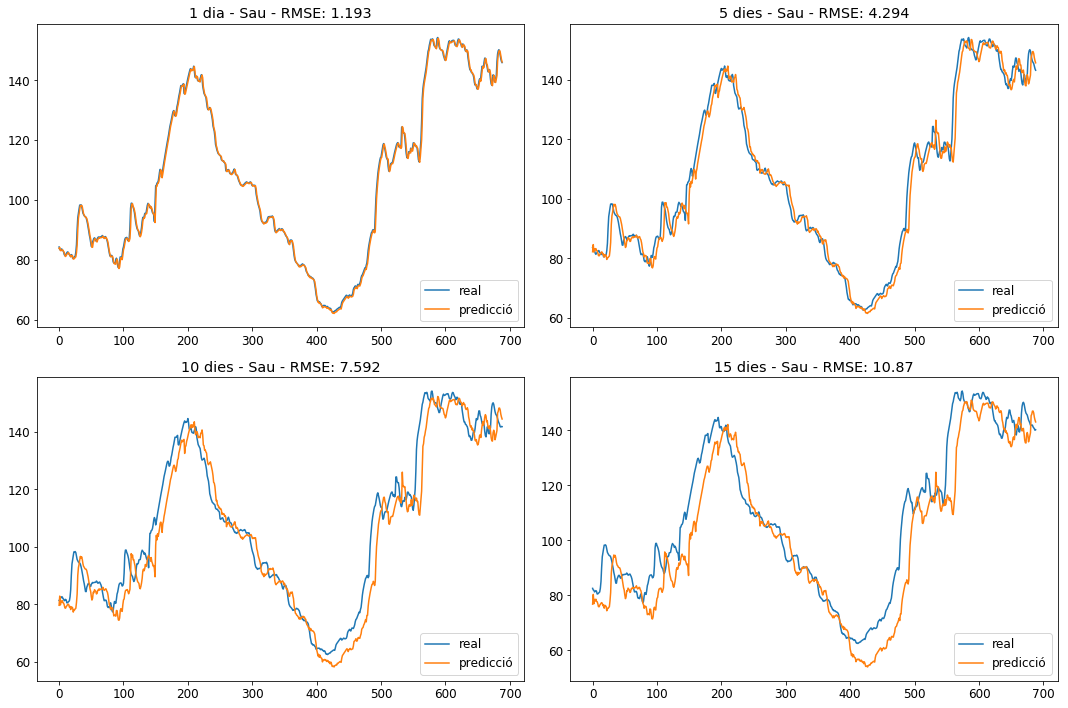

In [49]:
plt.rcParams.update({'font.size': 12})

plt.subplots_adjust(hspace=0.5)

title1 = '1 dia - Sau - RMSE: '+str(round(dies[0],3))
title5 = '5 dies - Sau - RMSE: '+str(round(dies[4],3))
title10 = '10 dies - Sau - RMSE: '+str(round(dies[9],3))
title15 = '15 dies - Sau - RMSE: '+str(round(dies[14],3))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot time signal:
axes[0, 0].set_title(title1)
axes[0, 0].plot(test1, label='real')
axes[0, 0].plot(dia1, label='predicció')
axes[0, 0].legend(loc=4)

axes[0, 1].set_title(title5)
axes[0, 1].plot(test5, label='real')
axes[0, 1].plot(dia5, label='predicció')
axes[0, 1].legend(loc=4)

axes[1, 0].set_title(title10)
axes[1, 0].plot(test10, label='real')
axes[1, 0].plot(dia10, label='predicció')
axes[1, 0].legend(loc=4)

axes[1, 1].set_title(title15)
axes[1, 1].plot(test15, label='real')
axes[1, 1].plot(dia15, label='predicció')
axes[1, 1].legend(loc=4)


fig.tight_layout()
plt.show()

In [50]:
from tabulate import tabulate
headers=[]
for i in range(len(RMSE_days)):
    headers.append('step '+str(i+1))


table1 = tabulate([RMSE_days[0:10]], headers, tablefmt="fancy_grid")
table2 = tabulate([RMSE_days[10:15]], headers[10:15], tablefmt="fancy_grid")
#output
print(table1)
print(table2)

╒══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╕
│   step 1 │   step 2 │   step 3 │   step 4 │   step 5 │   step 6 │   step 7 │   step 8 │   step 9 │   step 10 │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╡
│  1.19318 │  2.07263 │  2.86202 │  3.59416 │  4.29373 │  4.96662 │  5.62753 │  6.28904 │  6.94634 │   7.59195 │
╘══════════╧══════════╧══════════╧══════════╧══════════╧══════════╧══════════╧══════════╧══════════╧═══════════╛
╒═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│   step 11 │   step 12 │   step 13 │   step 14 │   step 15 │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│   8.23466 │   8.88088 │   9.53461 │   10.1969 │   10.8697 │
╘═══════════╧═══════════╧═══════════╧═══════════╧═══════════╛
